In [1]:
#importing the library
from pyforest import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading thde dataset
df=pd.read_csv("BaseBall.csv")


<IPython.core.display.Javascript object>

# Attributes:-
W→Number of predicted wins
R→Runs
AB→At Bats
H→Hits
2B→Doubles
3B→Triples
HR→Homeruns
BB→Walks
SO→Strikeouts
SB→Stolen Bases,
RA→Runs Allowed
ER→Earned Runs
CG→Earned Run Average (ERA)
SHO→Shutouts
SV→Saves
E→and Errors

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#check the dtypes of dataset
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
#check the shape of the dataset
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


After seen the above result we got that  no null value are present inside the data lets comfirm it.

<IPython.core.display.Javascript object>

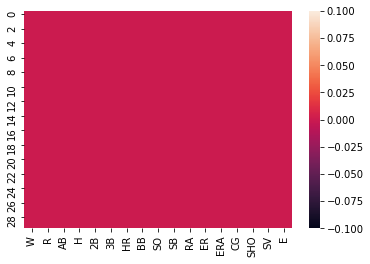

In [7]:
#check the null value graphicaly with seaborn
sns.heatmap(df.isnull())

 K.O(Key Observation)
  this dataset has no missing value
 If there were any ,you would've noticed in figure represented by different colour shade

In [8]:
#lets describe the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


KO→
1 there is a large differnce between 75% percentile and max in R,ERA,SHO,SV and E columns

# Outliers


<IPython.core.display.Javascript object>

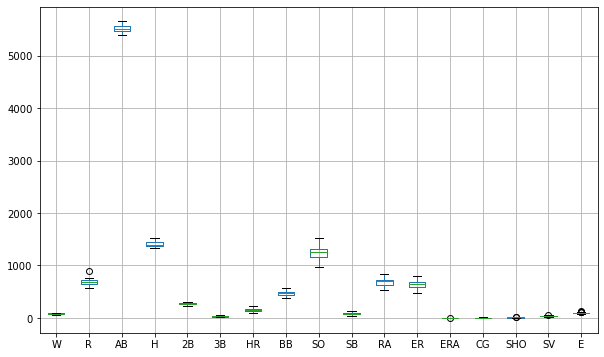

In [9]:
#now check the outliers with boxplot
plt.figure(figsize=(10,6))
df.boxplot()

From the ▲ above chart we can say that R,ERA,SHO,SV and E columns are having the outliers
Lets plot it  individually fo the better result

# Dsidtibution

<IPython.core.display.Javascript object>

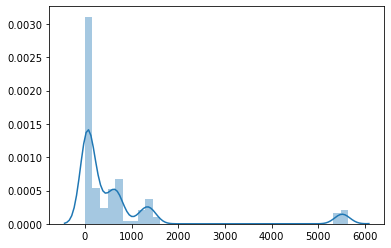

In [10]:
sns.distplot(df)

#from the above chart we can say that our data is right skewd 
lets check the skewd value of data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

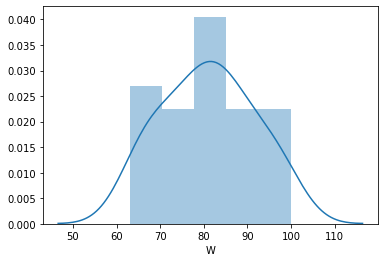

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

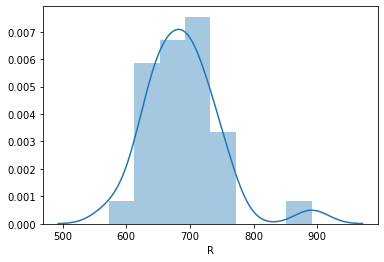

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

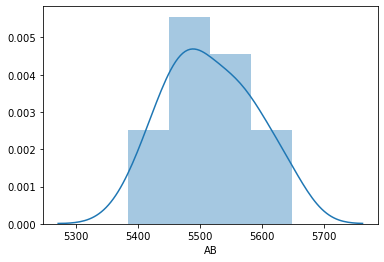

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

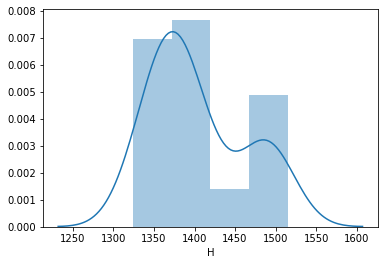

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

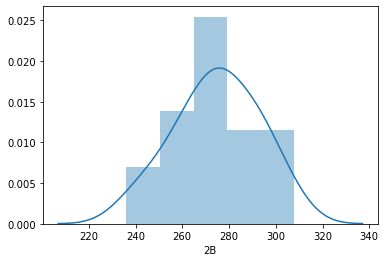

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

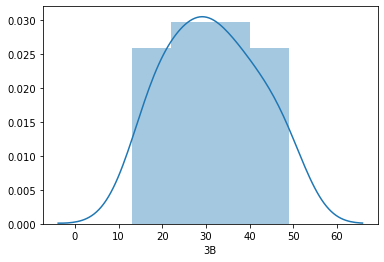

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

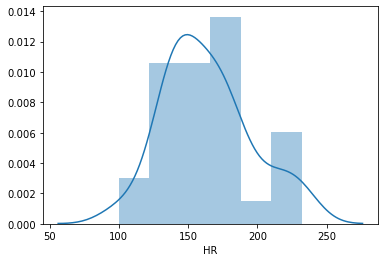

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

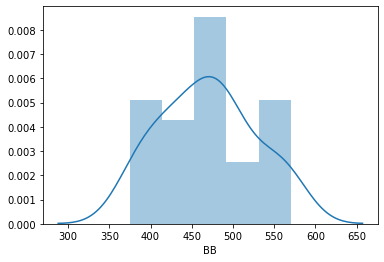

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

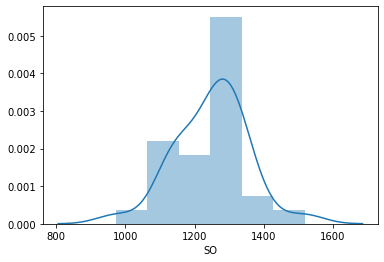

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

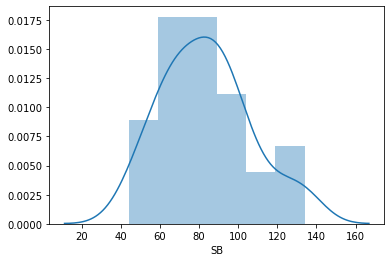

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

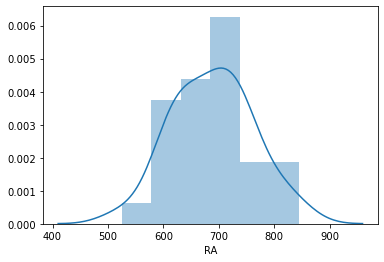

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

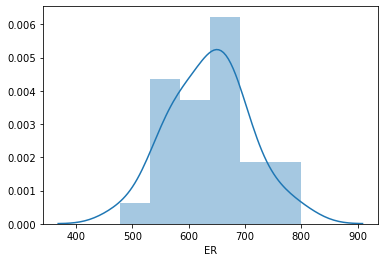

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

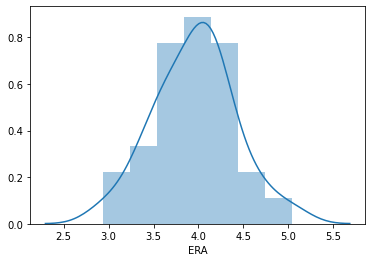

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

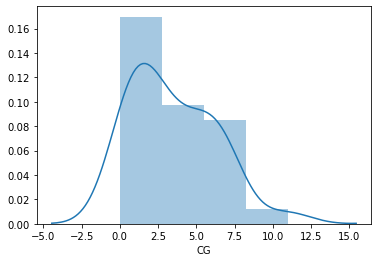

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

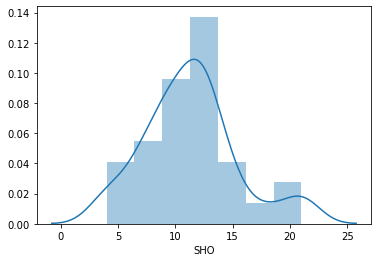

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

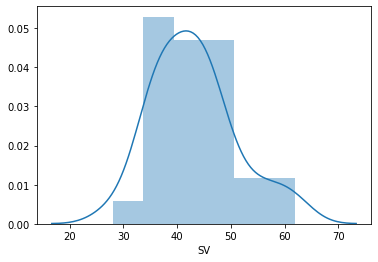

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

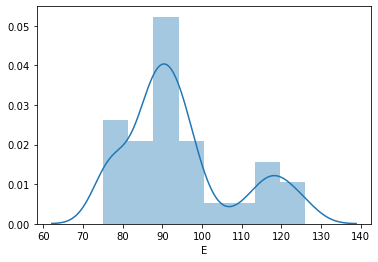

In [11]:
c=df.columns
for i in c:
    sns.distplot(df[i])
    plt.show()

In [12]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

After seen the above data we are confirm that maximunm data are right(+ve) skewd

# Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

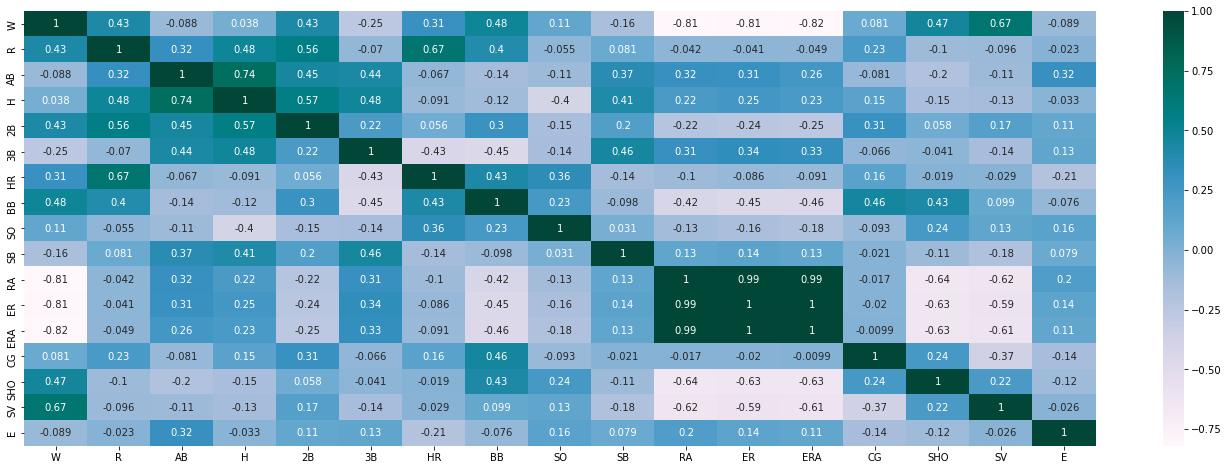

In [13]:
#lets check the correlation with heatmap
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

light shade are nagetively corelated
Dark shade are highly corelated 
Here RA,ER AND ERA  are nagetively corelated with W 
On this data set we are going to predict the W so we can't drop it

# Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

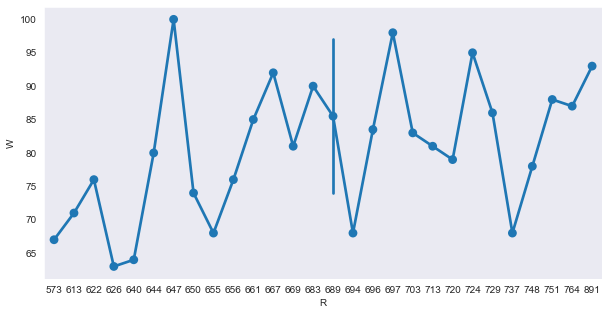

In [14]:
plt.figure(figsize=(10,5))
sns.set_style("dark")
sns.pointplot(x="R",y="W",data=df)


From the above chart we saw that there is no paricular runs for wins but when the runs are 644-647 the teams wins the highest match 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

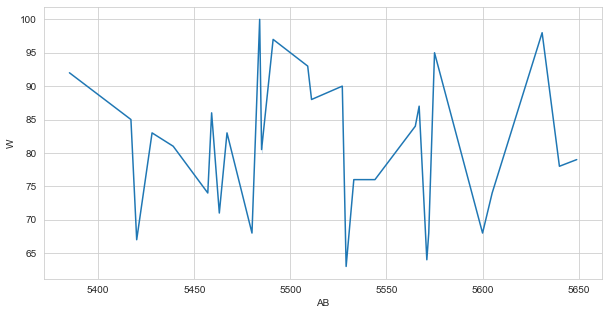

In [15]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.lineplot(x="AB",y="W",data=df)
plt.show()

K O → here we can say after seen the above chart that when the teams time of the bat is between 5475-5500 teams are wins the more matches

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

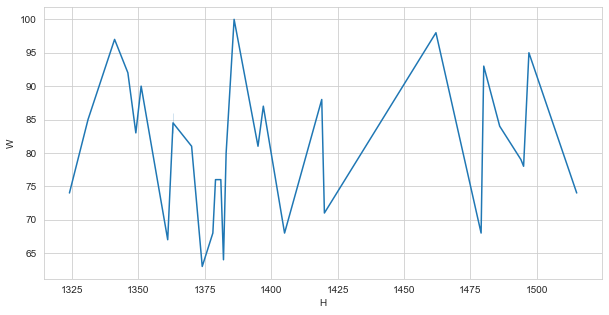

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x="H",y="W",data=df)
plt.show()

KO→according to the above chart  when the batter safely reaches or passes first base after hitting the ball(HIts) between 
1380-1390 the teams wins frequencly.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

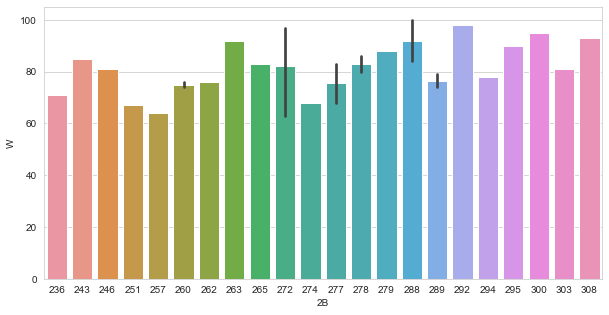

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x="2B",y="W",data=df)


Here we can see that when the  batter get the run on double base ,which is between 263-300 the team wins ratio almost 85%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

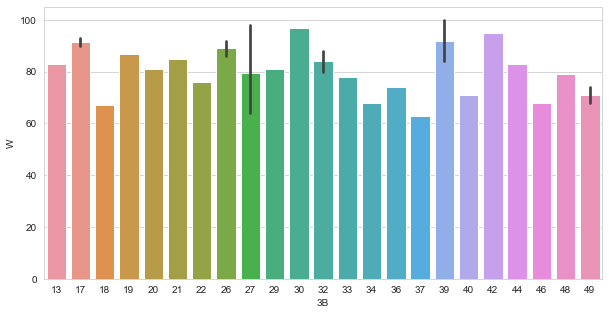

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x="3B",y="W",data=df)

Similarly the  batter get the run on Tripule base ,which is between 263-300 the team wins ratio almost 80% 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

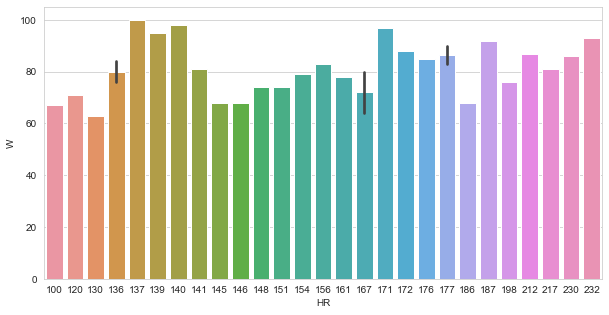

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x="HR",y="W",data=df)

From the above ▲ chart we got the info that when the bater reach home safely more than 170tym  teams are wined maximunm time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

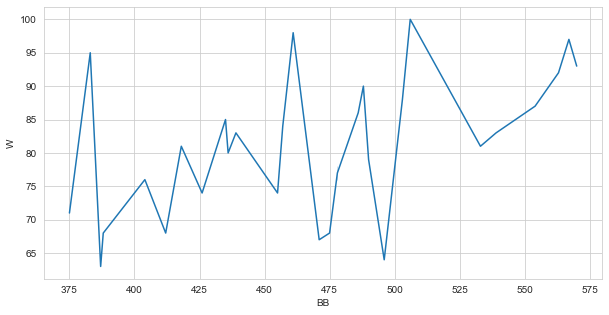

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x="BB",y="W",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

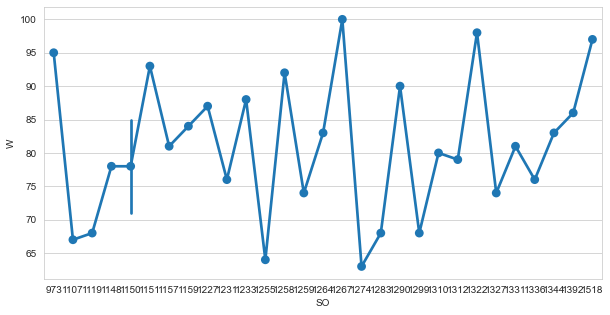

In [21]:
plt.figure(figsize=(10,5))
sns.pointplot(x="SO",y="W",data=df)

Here we can see taht when the teams wins is on top on the same time stikeout also high

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

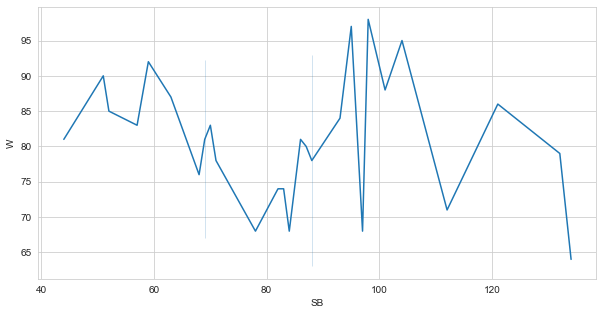

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x="SB",y="W",data=df)

We can see th above chart which is telling that when the Stolen Bases is crossing 120 times then the team is loosing the match continuously

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

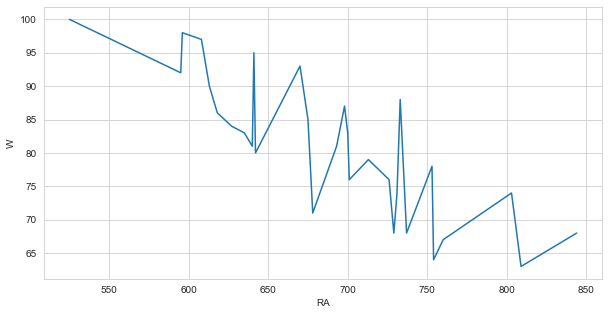

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x="RA",y="W",data=df)

Here also same case like stolen bases when the Runs Aloowed is crossing a particular range(above 800) the team is loosing the matches 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

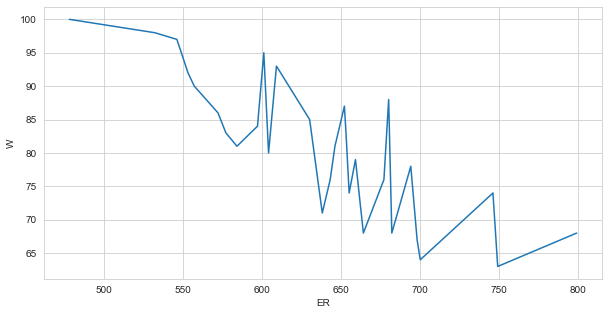

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(x="ER",y="W",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

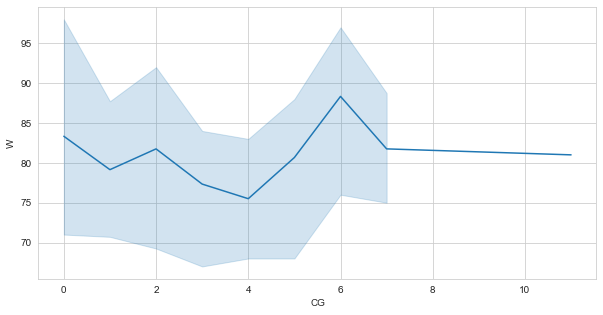

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x="CG",y="W",data=df)

Here we can see that when Earned Run Average is crossed 4 then team is wining the matches so we can say here the  Earned Run Average 4 is good  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

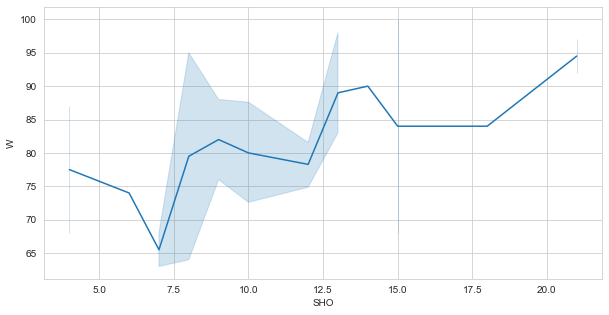

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x="SHO",y="W",data=df)

We can see from ▲ chart that when the team Shutouts is crossing a particular point(17.5) the team is winnig the match continuously

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

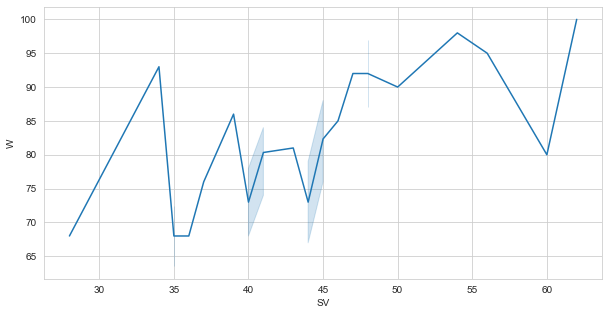

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x="SV",y="W",data=df)

From thr above chart we can say that when the pitchers are save the runs 60 or more then the team is wining the match continuously

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

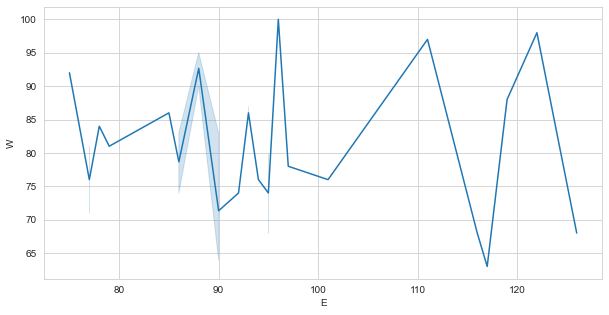

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(x="E",y="W",data=df)

From the above chart we can say that when the team making more error they are loosing the more matchs

# Removing Outliers

In [29]:
#importing zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([5], dtype=int64), array([1], dtype=int64))


In [30]:
#lets check ither we are  dect the correct zscore or not
z[5][1]

3.5096470447193067

In [31]:
#lets making a new data from  by removing the outlier
df_new=df[(z<3).all(axis=1)]

In [32]:
#lets check the old and new dataframe shape
print(df.shape,df_new.shape)

(30, 17) (29, 17)


# Preprocessing

In [33]:
#lets divevd the df_new into input and output
df_x=df_new.drop(columns=["W"])
y=df_new[["W"]]


In [34]:
#Standardising the data with standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

<IPython.core.display.Javascript object>

# Model creation

In [35]:
#In this data set we know that out target variable win is continuous so we are going to take Linear regresson
#lets make a function for getting the best random_satae for a model toget better accuracy(r2_score)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
def Base_acc(rgr,x,y):
    max_acc=0
    for rd in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
        rgr.fit(x_train,y_train)
        prd=rgr.predict(x_test)
        acc=r2_score(y_test,prd)
        if acc>max_acc:
            max_acc=acc
            final_rd=rd
        
    print("max ccuracy score coresponding to ",final_rd,"♫is♫",max_acc*100)
    print("Mean_Squared_Error is: ",mean_squared_error(y_test,prd))
    print("Mean_Absolute_Error is: ",mean_absolute_error(y_test,prd))
    return final_rd


In [36]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score   
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("mean r2 score for ",model,c.mean())
    print("Standard deviation  in r2 score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the r2score mean is",c.mean())

In [37]:
#importing the Linear regression
#cheking the best random score
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
Base_acc(lnr,x,y)

max ccuracy score coresponding to  64 ♫is♫ 85.56290952095527
Mean_Squared_Error is:  23.51697996006072
Mean_Absolute_Error is:  4.477012133523933


64

In [38]:
k(lnr,x,y)

mean r2 score for  LinearRegression() 0.03762866049631715
Standard deviation  in r2 score for  LinearRegression() 0.5704779766442197

******************************************************
After seen the cross validation score of LinearRegression() the r2score mean is 0.03762866049631715


In [39]:
#Take another algorithm
#with grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={"n_neighbors":range(0,26)}
GK=GridSearchCV(kn,parameters,cv=10,scoring="r2")
GK.fit(x,y)
GK.best_params_

{'n_neighbors': 6}

In [40]:
#we got the result form Gridsearchcv the n_neighobrs is 6,wich is a even number,
#if we take a odd nuber for n_neighbors then we will get the better result.so we are taking n_neighbors=7
knn=KNeighborsRegressor(n_neighbors=7)
Base_acc(knn,x,y)

max ccuracy score coresponding to  51 ♫is♫ 77.06901856219875
Mean_Squared_Error is:  42.9455782312925
Mean_Absolute_Error is:  6.1428571428571415


51

In [41]:
k(knn,x,y)

mean r2 score for  KNeighborsRegressor(n_neighbors=7) -0.2632426808017265
Standard deviation  in r2 score for  KNeighborsRegressor(n_neighbors=7) 1.2387270419790413

******************************************************
After seen the cross validation score of KNeighborsRegressor(n_neighbors=7) the r2score mean is -0.2632426808017265


In [42]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
r=Ridge()
parameters={"alpha":[0.00001,0.0001,0.001,0.01,0.1,1.0]}
gl=GridSearchCV(r,parameters,cv=5,scoring="r2")
gl.fit(x,y)
gl.best_params_

{'alpha': 1.0}

In [43]:
rr=Ridge(alpha=1.0)
Base_acc(rr,x,y)

max ccuracy score coresponding to  75 ♫is♫ 97.04140728447965
Mean_Squared_Error is:  12.414214871855663
Mean_Absolute_Error is:  2.9263606318786635


75

In [44]:
k(rr,x,y)

mean r2 score for  Ridge() 0.33747787690695663
Standard deviation  in r2 score for  Ridge() 0.8451497257649974

******************************************************
After seen the cross validation score of Ridge() the r2score mean is 0.33747787690695663


In [45]:
E=ElasticNet()
parameters={"alpha":[0.00001,0.0001,0.001,0.01,0.1,1.0]}
gl=GridSearchCV(E,parameters,cv=5,scoring="r2")
gl.fit(x,y)
gl.best_params_

{'alpha': 0.1}

In [46]:
ll=ElasticNet(alpha=0.1)
Base_acc(ll,x,y)

max ccuracy score coresponding to  75 ♫is♫ 96.04252781055695
Mean_Squared_Error is:  13.341425301225811
Mean_Absolute_Error is:  2.895023404471466


75

In [47]:
k(ll,x,y)

mean r2 score for  ElasticNet(alpha=0.1) 0.3552727260368844
Standard deviation  in r2 score for  ElasticNet(alpha=0.1) 0.8659831689370345

******************************************************
After seen the cross validation score of ElasticNet(alpha=0.1) the r2score mean is 0.3552727260368844


In [48]:
l=Lasso()
parameters={"alpha":[0.00001,0.0001,0.001,0.01,0.1,1.0]}
gl=GridSearchCV(l,parameters,cv=5,scoring="r2")
gl.fit(x,y)
gl.best_params_

{'alpha': 1.0}

In [49]:
l=Lasso(1.0)
Base_acc(l,x,y)

max ccuracy score coresponding to  82 ♫is♫ 96.158858549189
Mean_Squared_Error is:  19.396991206696573
Mean_Absolute_Error is:  3.683851279837576


82

In [50]:
k(l,x,y)

mean r2 score for  Lasso() 0.4152252452373902
Standard deviation  in r2 score for  Lasso() 0.7424270277748943

******************************************************
After seen the cross validation score of Lasso() the r2score mean is 0.4152252452373902


In [57]:
#after seen the above table i am going to finalise my model with  Lasso  regressor because this algorithm is performing well in this dataset.
#with the random sate of 82 
l=Lasso(1.0)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=0.20)
l.fit(x_train,y_train)
prd=l.predict(x_test)
accuracy=r2_score(y_test,prd)
print("accuracy is →",accuracy*100)
print()
print("Mean_Squared_Error is: ",mean_squared_error(y_test,prd))
print()
print("Mean_Absolute_Error is: ",mean_absolute_error(y_test,prd))

accuracy is → 96.158858549189

Mean_Squared_Error is:  2.809368177773706

Mean_Absolute_Error is:  1.4971821466829571


In [58]:
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(l,'Base.pkl')

['Base.pkl']

In [59]:
#saving the predict as csv
joblib.dump(l,'Base.csv')

['Base.csv']

In [60]:
#lets call the model and predict it
model=joblib.load('Base.csv')
model.predict(x_test)

array([64.82475356, 79.70338072, 77.81192653, 89.96824273, 72.16523186,
       85.44604294])